# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
# how many entries are there in each column..
df_data.count()

year                     962
category                 962
prize                    962
motivation               874
prize_share              962
laureate_type            962
full_name                962
birth_date               934
birth_city               931
birth_country            934
birth_country_current    934
sex                      934
organization_name        707
organization_city        707
organization_country     708
ISO                      934
dtype: int64

**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [ ]:
df_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
957    False
958    False
959    False
960    False
961    False
Length: 962, dtype: bool

In [ ]:
# no of duplicate data
df_data.duplicated().values.sum()

0

### Check for NaN Values

In [ ]:
df_data.isna().values.any()

True

In [ ]:
print(f"There are {df_data.isna().values.sum()} NaN value in our dataframe. ")

There are 1023 NaN value in our dataframe. 


In [ ]:
#Which column have NaN value. and how many..
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

Now finding the reason for such a large no of NaN values..

### Here in below code, we have created column_subset which is basically a list of column we want to appear in our dataframe.
we use location method .loc[] to select only those row corresponding to NaN value in birth_date column.



In [ ]:
column_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data['birth_date'].isna()][column_subset]
# it is observed that orgainsation name is in full_name column

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [ ]:
# The  same thing we have done here with organisation column..
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data[df_data.organization_name.isna()][col_subset]
# Many winner do not belongs to any organisation so there are some nan value in organisation_name column.

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
df_data.birth_date=pd.to_datetime(df_data.birth_date)


#### Add a Column with the Prize Share as a Percentage

prize share column '/' we first need to split it and extarct both num and denominator na dfinally add it .

In [ ]:
separated_value=df_data.prize_share.str.split('/',expand=True)
print(f"The value after separting is of {type(separated_value[0][1])}")

# Now converting it to numeric type.
numerator=pd.to_numeric(separated_value[0])
denominator=pd.to_numeric(separated_value[1])

# Finally adding new column named 'share_pct'.
df_data['share_pct']=numerator/denominator

The value after separting is of <class 'str'>


In [ ]:
# Now checking our column added or not
df_data.share_pct

0     1.00
1     1.00
2     1.00
3     0.50
4     0.50
      ... 
957   0.33
958   1.00
959   0.25
960   0.25
961   0.50
Name: share_pct, Length: 962, dtype: float64

In [ ]:
# dtype of each column in df
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
MF_prize_data=df_data.sex.value_counts()
MF_prize_data

Male      876
Female     58
Name: sex, dtype: int64

In [ ]:
donut=px.pie(names=MF_prize_data.index,
             labels=MF_prize_data.index,
             values=MF_prize_data.values,
             title='Percentage of Male and Female Winners',
             hole=0.8
             )
donut.update_traces(textposition='inside', textfont_size=14,textinfo='percent')
donut.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
df_data[df_data.sex=='Female'].sort_values('year',ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [ ]:
# If you don't pass 'Keep=False' then by default only unique entries will print.
multiple_winner=df_data[df_data.duplicated(subset=['full_name'],keep=False)]
print(f"There are {multiple_winner.full_name.nunique()} winner get novel prize more than one times..")

There are 6 winner get novel prize more than one times..


In [ ]:
#Continue
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winner[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [ ]:
bar_data=df_data.category.value_counts()
bar_data

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [ ]:
#Now creating a bar chart
bar=px.bar(x=bar_data.index,
           y=bar_data.values,
           color=bar_data.index,
           color_continuous_scale='agsunset',
           title='No of prizes awarded per category')
bar.update_layout(xaxis_title='Nobel Prize Category',
                  yaxis_title='Number of Prizes',
                  coloraxis_showscale=False
                  )
bar.show()

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
df_data[df_data.category=='Economics'].sort_values('year')[:1]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
393,1970-01-01 00:00:00.000001969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [ ]:
cat_men_women=df_data.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count}).sort_values('prize',ascending=False)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [ ]:
# Now creating bar graph
bar_graph=px.bar(x=cat_men_women.category,
                 y=cat_men_women.prize,
                 title='Number of Prizes Awarded per Category split by Men and Women',
                 color=cat_men_women.sex
                 )
bar_graph.update_layout(xaxis_title='Nobel Prize Category',
                        yaxis_title='Number_of_prize')

bar_graph.show()

# **Using Matplotlib to Visualise Trends over Time**
### *Number of Prizes Awarded Over Time*

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [ ]:
# Creating dataframe
prize_per_year=df_data.groupby('year').count().prize
print(prize_per_year)
# Rolling above dataframe by 5 year by .rolling and mean().
moving_average=prize_per_year.rolling(window=5).mean()

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64


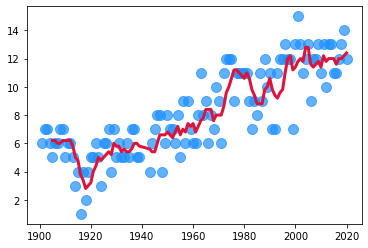

In [ ]:
#plotting scatter chart

plt.scatter(x=prize_per_year.index,
                y=prize_per_year.values,
                c='dodgerblue',#array-like or list of colors or color, optional(The Marker color:-))
                alpha=0.7,#The alpha blending value, between 0 (transparent) and 1 (opaque).
                s=100,#The marker size in points**2
                )
plt.plot(prize_per_year.index,
         moving_average.values,
         c='crimson',
         linewidth=3
         )

plt.show()

Now customise our plot by tapping into function like .figure, title ,xticks and yticks

In [ ]:
# Here I am creating year array for ticks along  x axis.
year_array=np.arange(1900,2021,step=5)

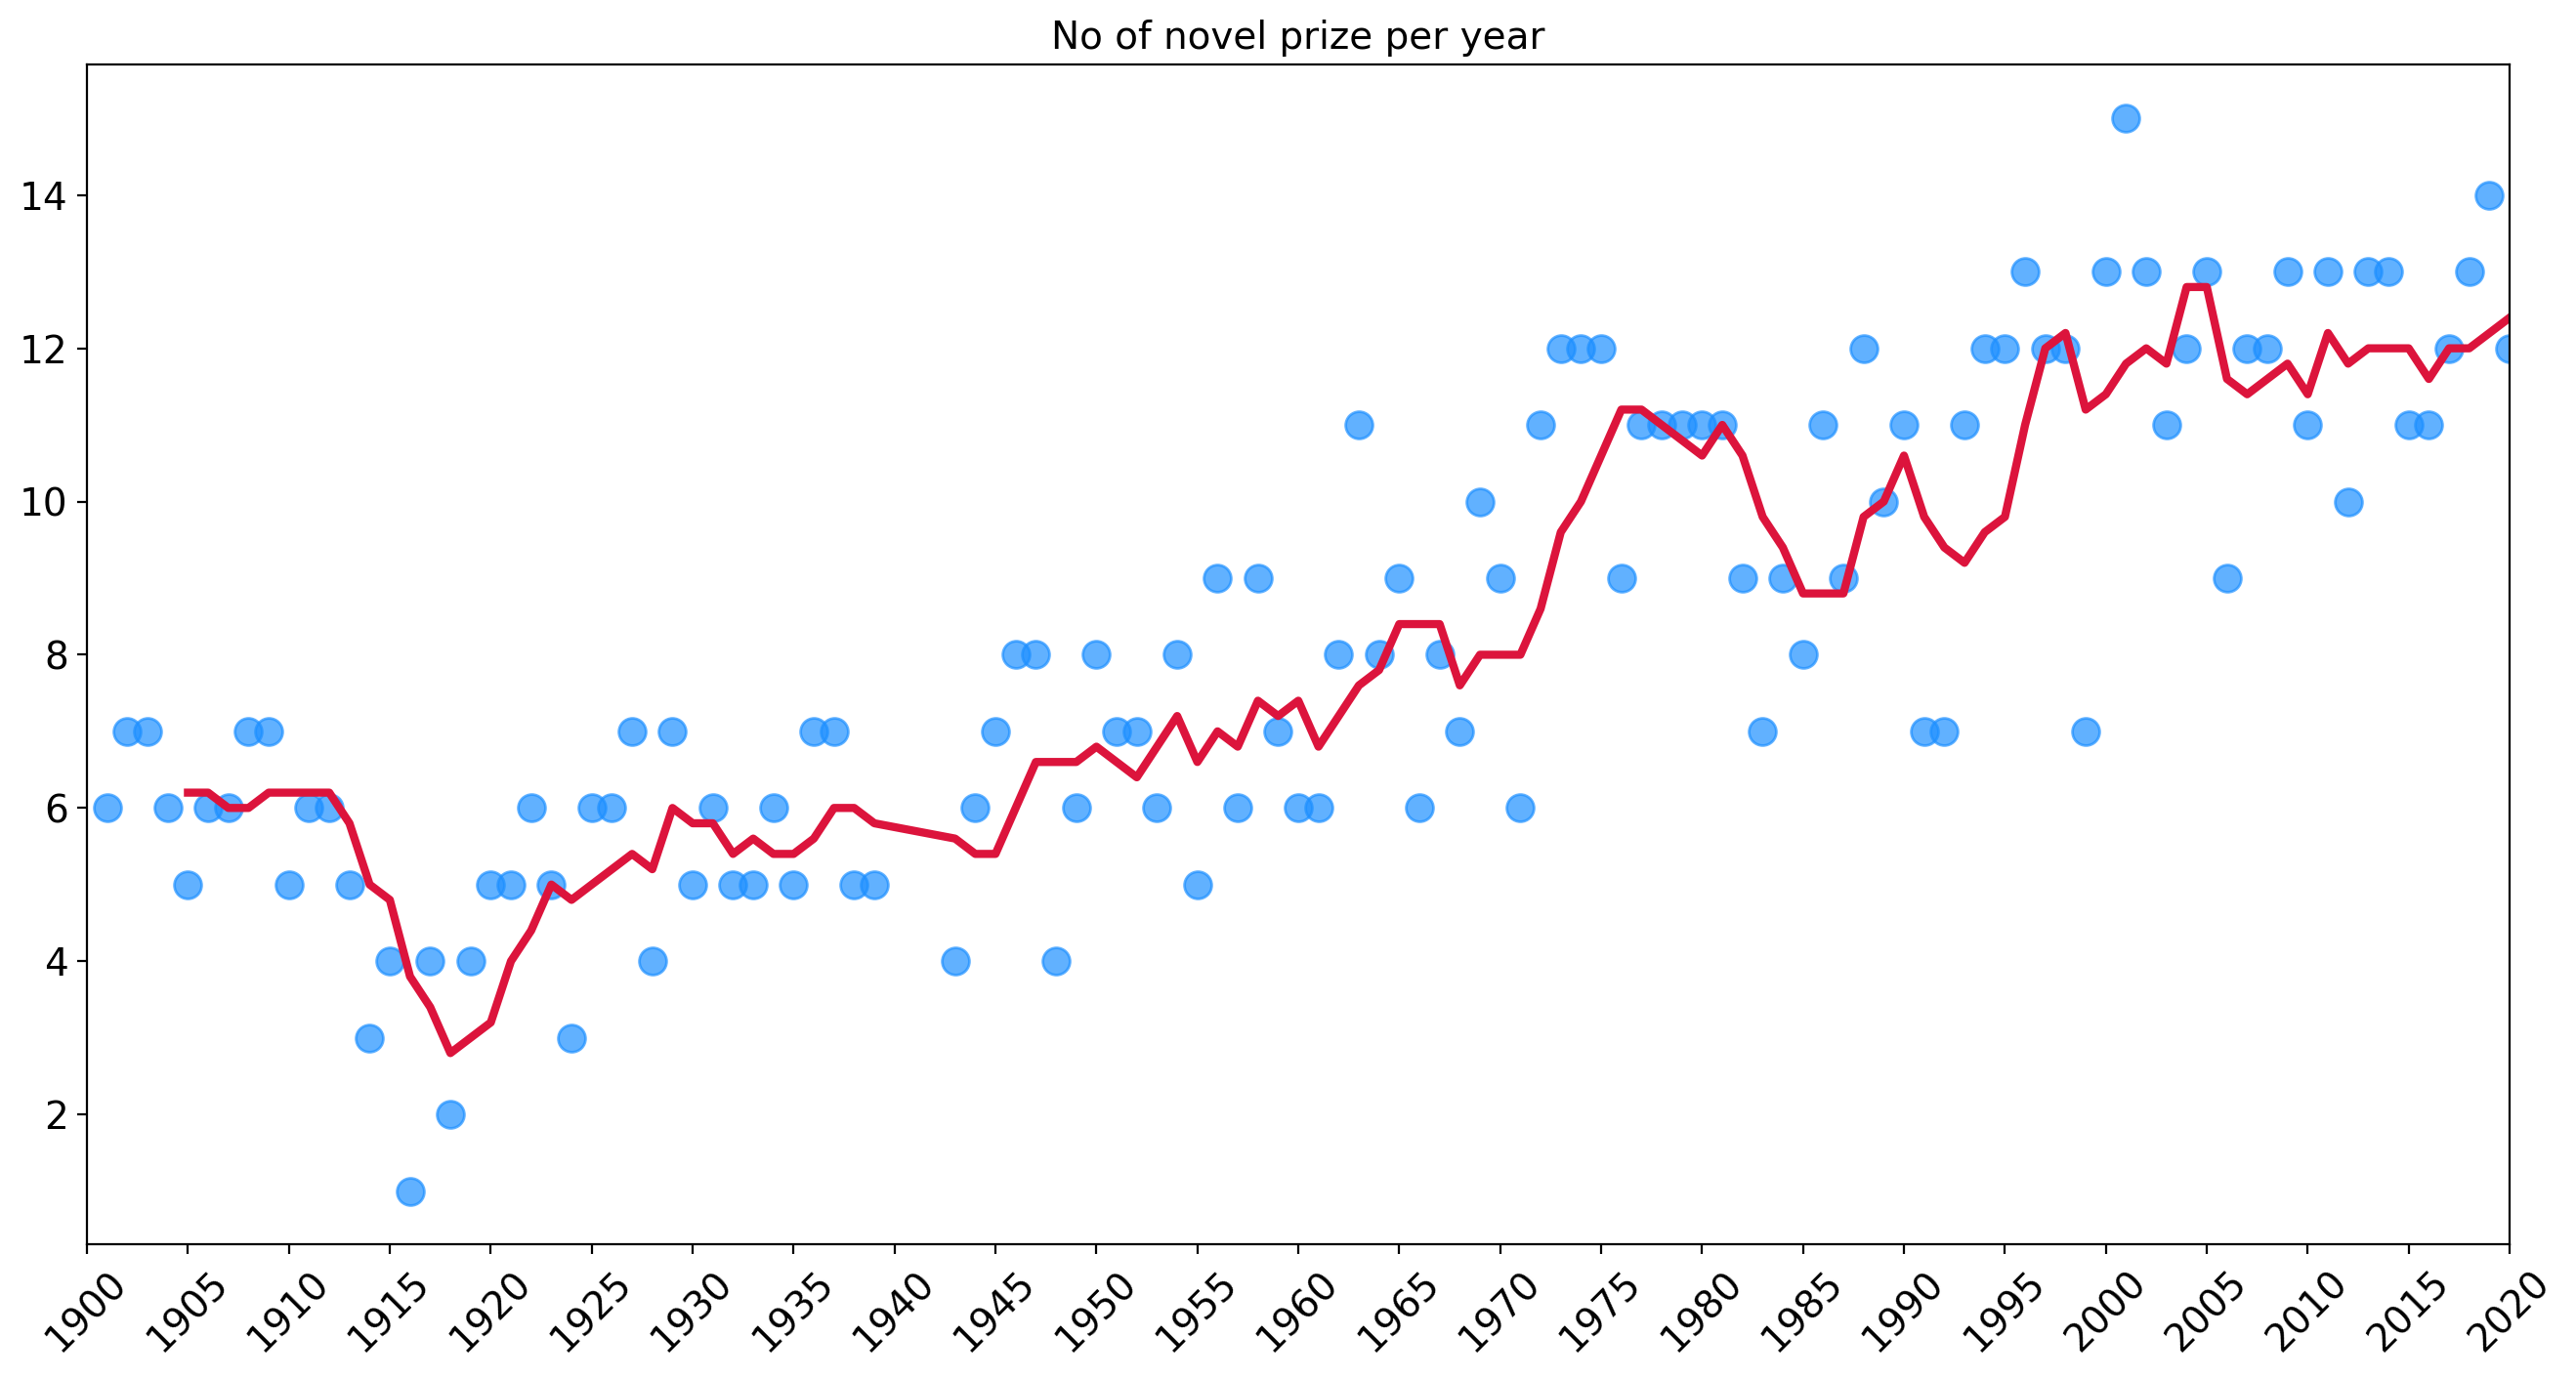

In [ ]:
plt.figure(figsize=(16,8),dpi=200)
plt.title('No of novel prize per year', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(ticks=year_array,fontsize=14,rotation=45)

ax=plt.gca()# get current axis
ax.set_xlim(1900,2020)

ax.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(prize_per_year.index,
         moving_average.values,
         c='crimson',
         linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [ ]:
avg_prc_shr=df_data.groupby('year').agg({'share_pct':pd.Series.mean})
rolling_mean=avg_prc_shr.rolling(window=5).mean()

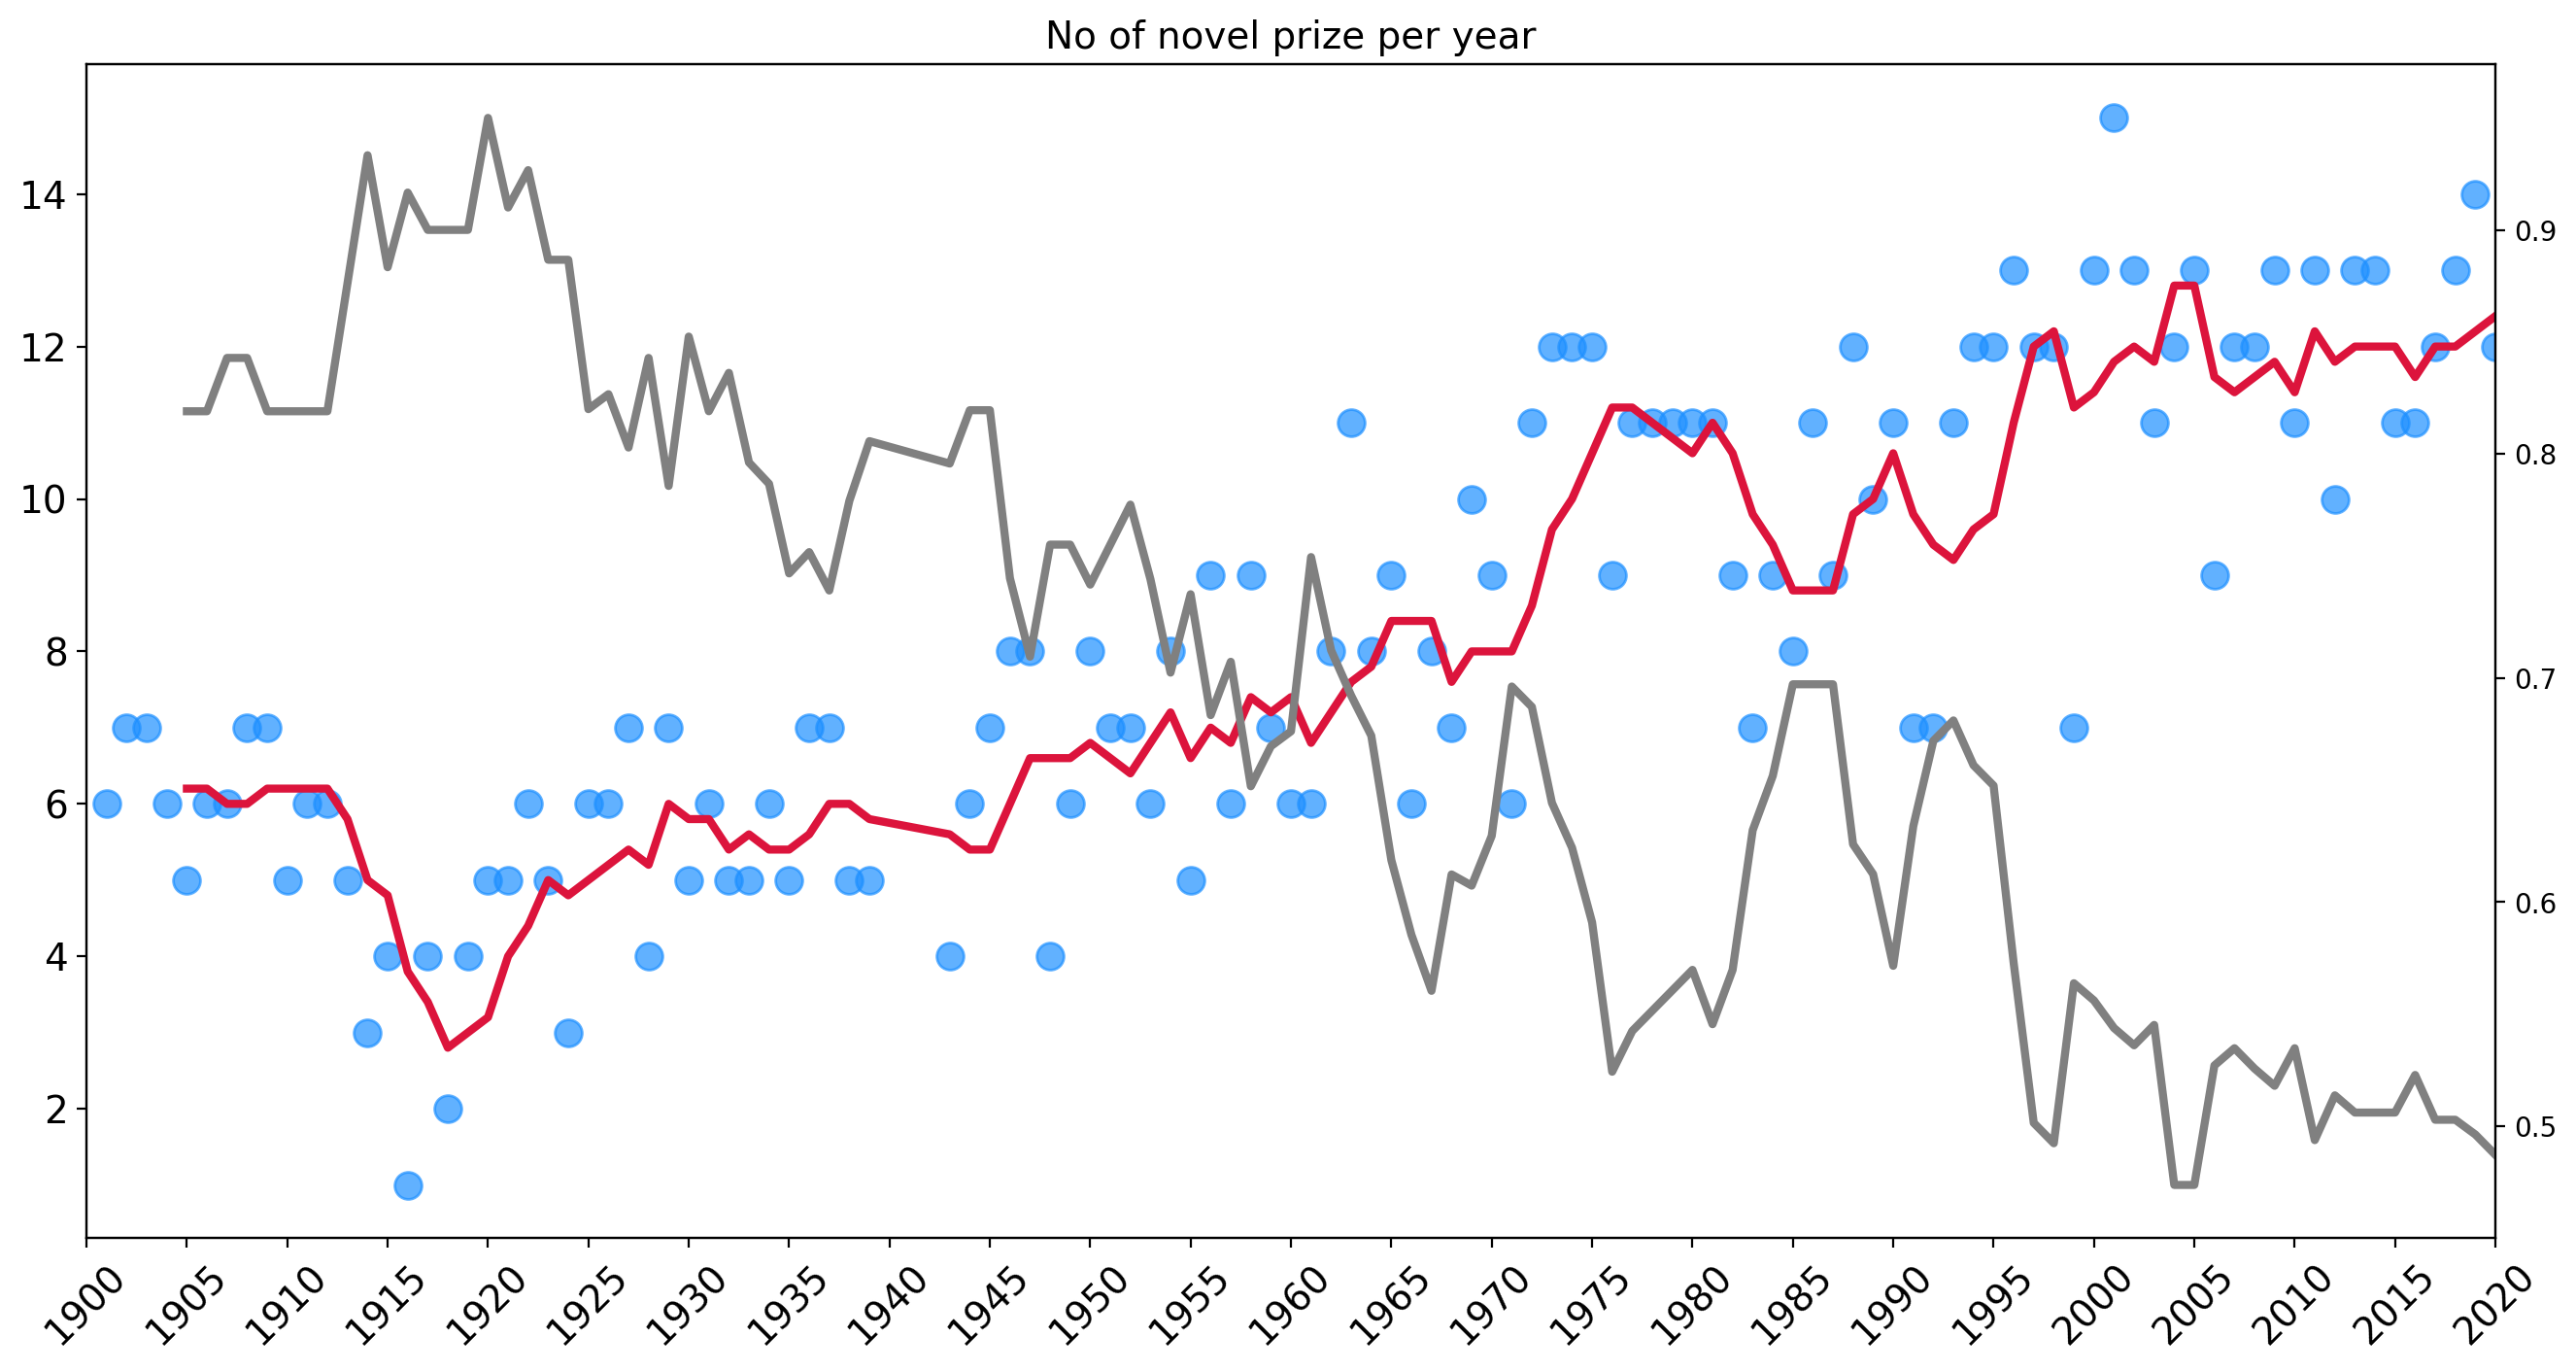

In [ ]:
# Now creating plot
plt.figure(figsize=(16,8),dpi=200)
plt.title('No of novel prize per year', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(ticks=year_array,fontsize=14,rotation=45)

# Double axis plot
ax1=plt.gca()# get current axis
ax2=ax1.twinx()

ax1.set_xlim(1900,2020)
ax1.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(prize_per_year.index,
         moving_average.values,
         c='crimson',
         linewidth=3)
# Price share on second axes.
ax2.plot(prize_per_year.index,
         rolling_mean.values,
         c='grey',
         linewidth=3)


plt.show()

### To look even more better, just invert the second axes by **.invert_yaxis()** or **.invert_xaxis()** method
here we are using .invert_yaxis() since we are interesting in inverting yaxis.

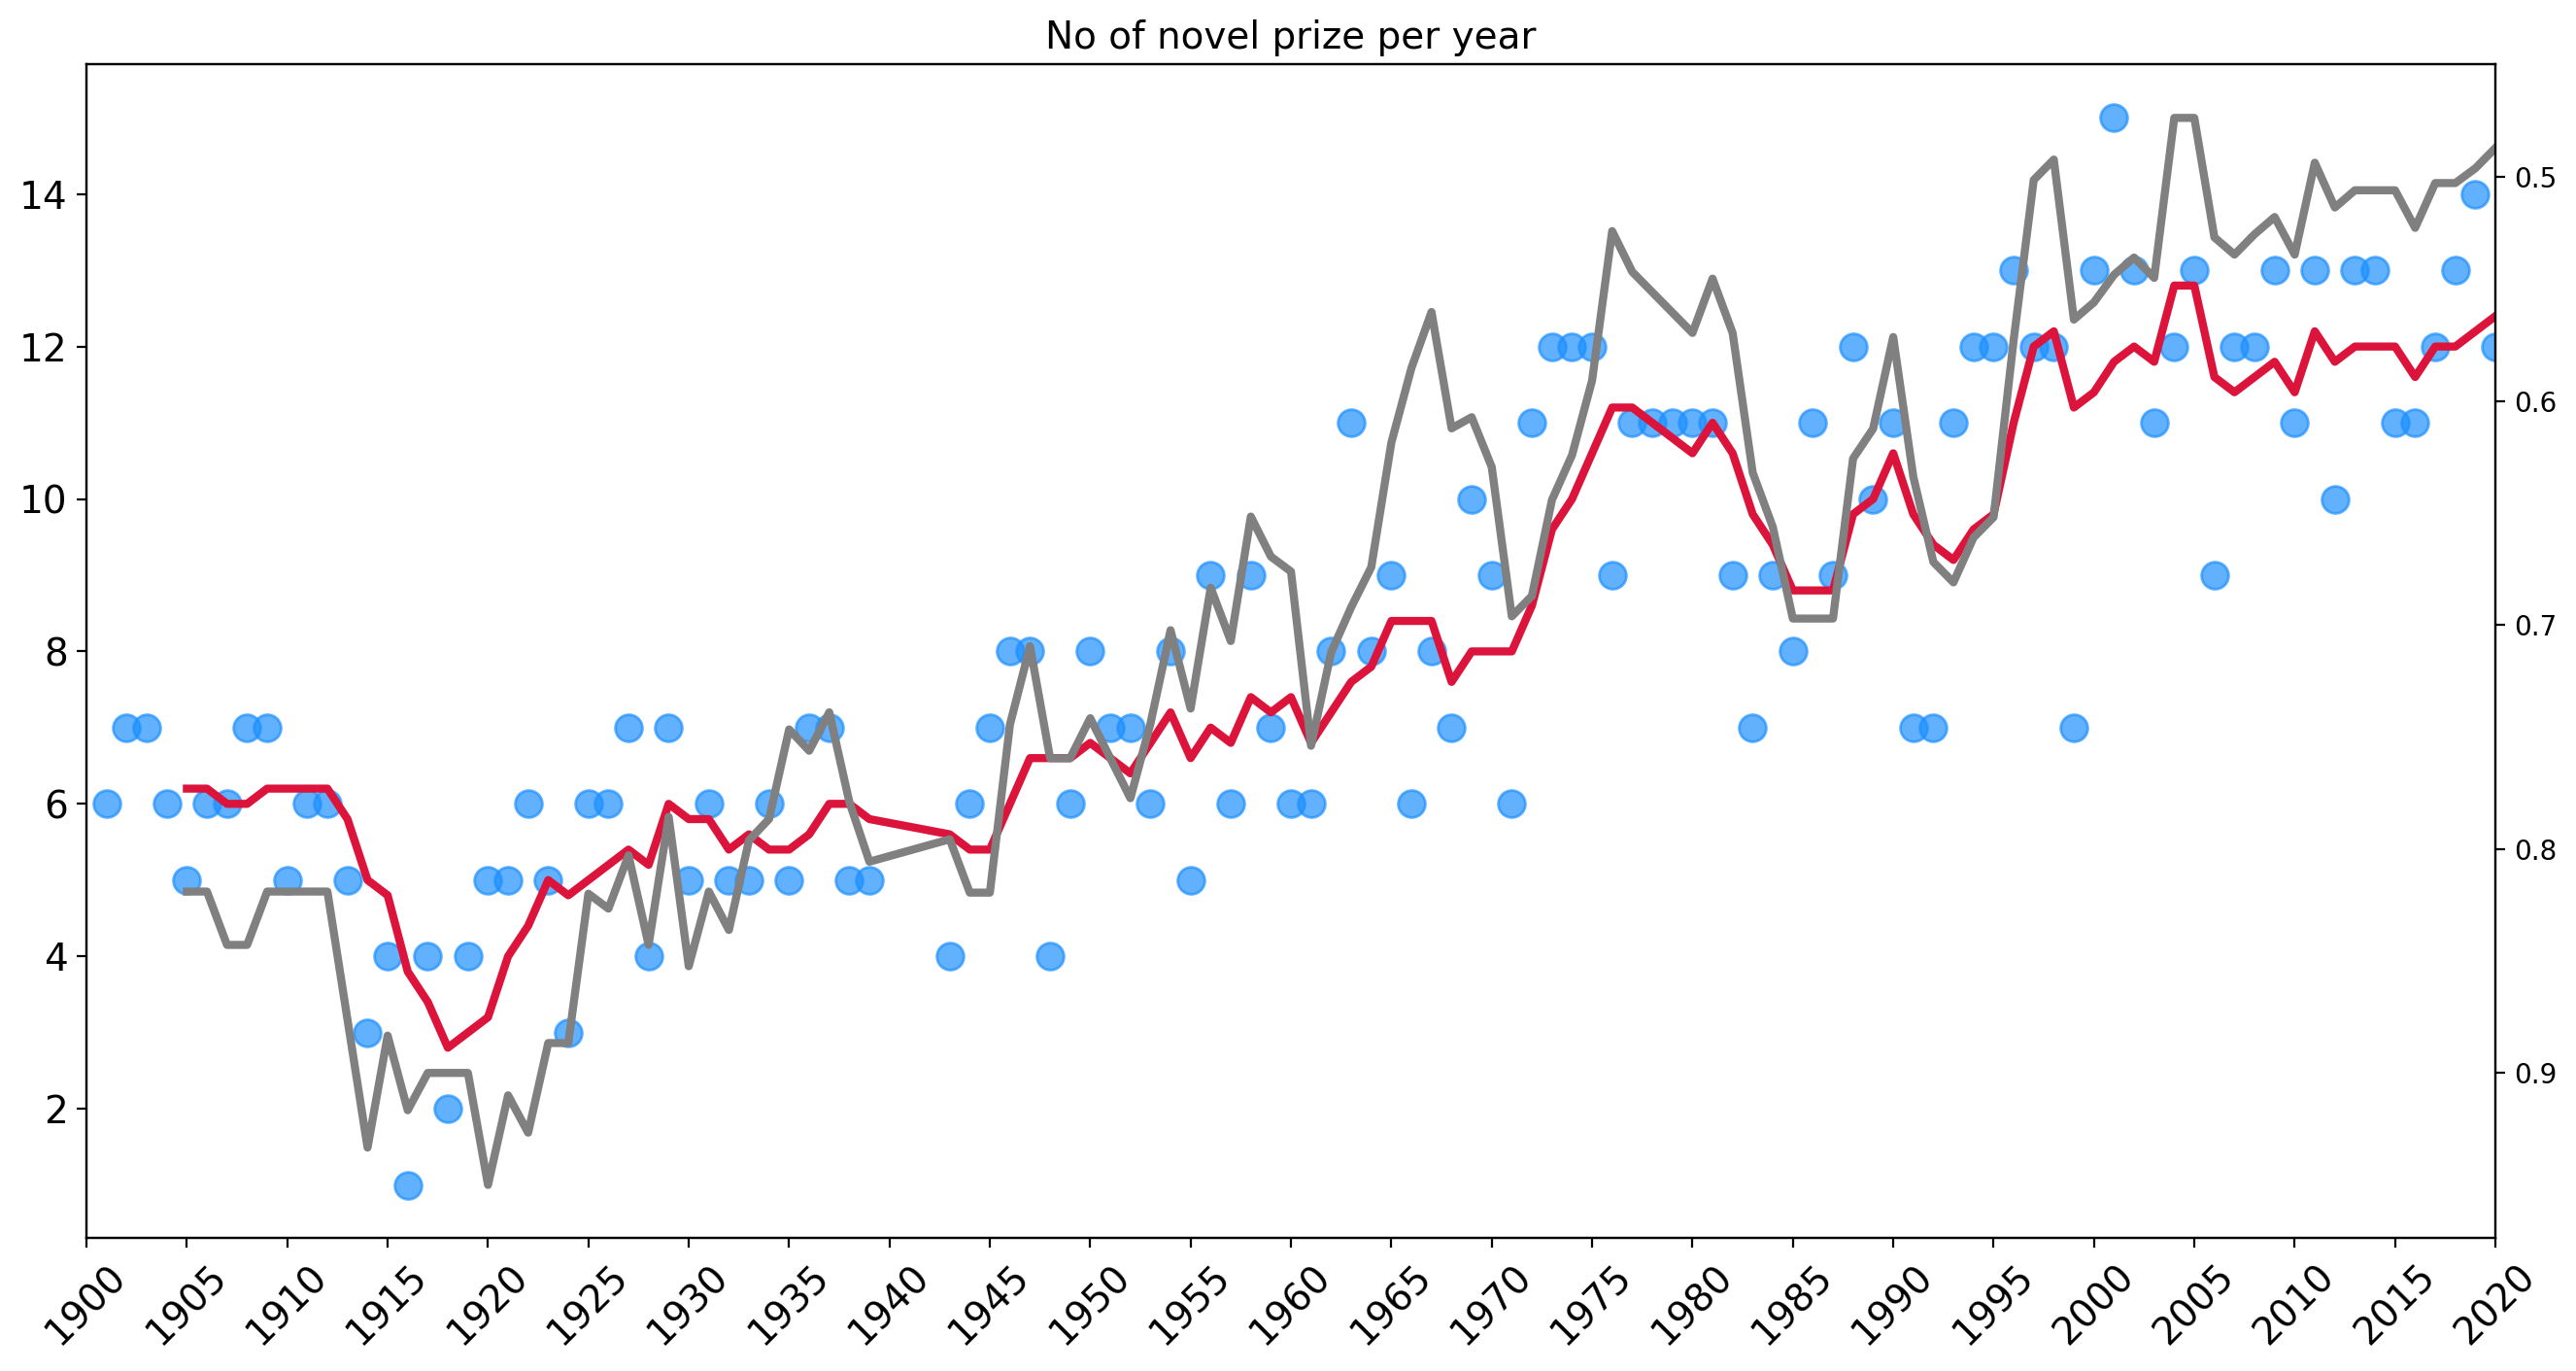

In [ ]:
plt.figure(figsize=(16,8),dpi=200)
plt.title('No of novel prize per year', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(ticks=year_array,fontsize=14,rotation=45)

# Double axis plot
ax1=plt.gca()# get current axis
ax2=ax1.twinx()

# Invert axis...
ax2.invert_yaxis()

ax1.set_xlim(1900,2020)
ax1.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(prize_per_year.index,
         moving_average.values,
         c='crimson',
         linewidth=3)
# Price share on second axes.
ax2.plot(prize_per_year.index,
         rolling_mean.values,
         c='grey',
         linewidth=3)


plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [ ]:
top20_countries=df_data.groupby('birth_country_current',as_index=False).agg({'prize':pd.Series.count})
top20_countries.sort_values('prize',inplace=True,ascending=False)
top20_countries=top20_countries[:20]
top20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [ ]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False
                    )
h_bar.show()

## **Displaying the Data on a Map**

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [ ]:
# First create df_countries DataFrame
df_countries=df_data.groupby(['birth_country_current', 'ISO'],as_index=False).agg({'prize':pd.Series.count})
df_countries.sort_values('prize',ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [ ]:
# Now create choropleth map to show data on map using plotly.
world_map=px.choropleth(
    df_countries,
    locations=df_countries.ISO,
    color=df_countries.prize,
    hover_name=df_countries.birth_country_current,

    color_continuous_scale=px.colors.sequential.Viridis,
    #color_continuous_scale=px.colors.sequential.Viridis_r  # '_r' to reverse the color scale
    #color_continuous_scale='teal'
)

world_map.update_layout(coloraxis_showscale=True)
world_map.show()
# above we have shown three way to use plotly built-in continuous color scale and all are giving the same reslut.

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [ ]:
country_vs_category_prizecount=df_data.groupby(['birth_country_current','category'],as_index=False).agg({'prize':pd.Series.count})
country_totalprize=df_data.groupby('birth_country_current',as_index=False).agg({'prize':pd.Series.count})
print(country_vs_category_prizecount)
# Now we are interested in only top 20 country.
country_totalprize.sort_values('prize',ascending=False,inplace=True)
top_country=country_totalprize[:20]
top_country

        birth_country_current    category  prize
0                     Algeria  Literature      1
1                     Algeria     Physics      1
2                   Argentina    Medicine      2
3                   Argentina       Peace      2
4                   Australia   Chemistry      1
..                        ...         ...    ...
206  United States of America     Physics     70
207                 Venezuela    Medicine      1
208                   Vietnam       Peace      1
209                     Yemen       Peace      1
210                  Zimbabwe       Peace      1

[211 rows x 3 columns]


,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [ ]:
# Now merging above two df to get desire resilt........
merged_df=pd.merge(country_vs_category_prizecount,top_country,on='birth_country_current')
merged_df

,birth_country_current,category,prize_x,prize_y
0,Australia,Chemistry,1,10
1,Australia,Medicine,7,10
2,Australia,Physics,2,10
3,Austria,Chemistry,5,18
4,Austria,Economics,1,18
...,...,...,...,...
104,United States of America,Economics,49,281
105,United States of America,Literature,10,281
106,United States of America,Medicine,78,281
107,United States of America,Peace,19,281


In [ ]:
#Changing column name to keep as we desired of
merged_df.columns=['birth_country_current', 'category', 'cat_prize', 'total_prize']# Simply assigning the column name to each column in ordered manner
# Lets check our column name.
merged_df.columns

Index(['birth_country_current', 'category', 'cat_prize', 'total_prize'], dtype='object')

In [ ]:

# Do some soot of shorting
merged_df.sort_values('total_prize',ascending=False,inplace=True)


In [ ]:
# Now finally ploting our bar chart
fig=px.bar(x=merged_df.total_prize,
           y=merged_df.birth_country_current,
           color=merged_df.category,
           orientation='h',
           title='Top 20 Countries by Number of Prizes and Category'
           )
fig.update_layout(
    xaxis_title='No of prize',
    yaxis_title='Country'
)
fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [ ]:
prize_by_year=df_data.groupby(['birth_country_current','year'],as_index=False).agg({'prize':pd.Series.count})
prize_by_year.sort_values('year',inplace=True)
prize_by_year

,birth_country_current,year,prize
118,France,1901,2
346,Poland,1901,1
159,Germany,1901,1
312,Netherlands,1901,1
440,Switzerland,1901,1
...,...,...,...
31,Austria,2019,1
221,Germany,2020,1
622,United States of America,2020,7
533,United Kingdom,2020,2


In [ ]:
# Then we creating a series that has cumulative sum of no of prize won.
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [ ]:
# Finally reset_index to have birth_country_current repeated
cumulative_prizes.reset_index(inplace=True)

In [ ]:
#Now creating line plot
l_chart=px.line(cumulative_prizes,
                x='year',
                y='prize',
                color='birth_country_current',
                hover_name='birth_country_current',
                hover_data=['birth_country_current','year','prize'])
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='No of prize')
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [ ]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [ ]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',
                      coloraxis_showscale=False)

org_bar.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [ ]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)

In [ ]:
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [ ]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)

In [ ]:
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')

city_bar.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [ ]:
country_city_org = df_data.groupby(by=['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
country_city_org.sort_values('prize',ascending=False,inplace=True)

In [ ]:
sun_chart=px.sunburst(country_city_org,
                      path=['organization_country', 'organization_city','organization_name'],
                      values='prize',
                      title='Where do discovery takes place??'
                      )

sun_chart.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)
sun_chart.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



* extract  year from birth_date using **Series.dt.year/month/hour/second**

In [ ]:
birth_year=df_data.birth_date.dt.year

In [ ]:
df_data['winning_age']=df_data.year-birth_year

### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [ ]:
# Name of Youngest and oldest Nobel laureate..
print(f"{df_data.full_name.loc[df_data.winning_age.idxmin()]} is Youngest laureate ")
print(f"{df_data.full_name.loc[df_data.winning_age.idxmax()]} is oldest laureate")

Malala Yousafzai is Youngest laureate 
John Goodenough is oldest laureate


In [ ]:
# Aliter way to find the youngest and oldest laureate.
print(display(df_data.nlargest(n=1,columns='winning_age')))# Here 'n' is the number of nlargest data you want..
display(df_data.nsmallest(n=1,columns='winning_age'))


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.333333,97.0


None


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0


In [ ]:
df_data.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

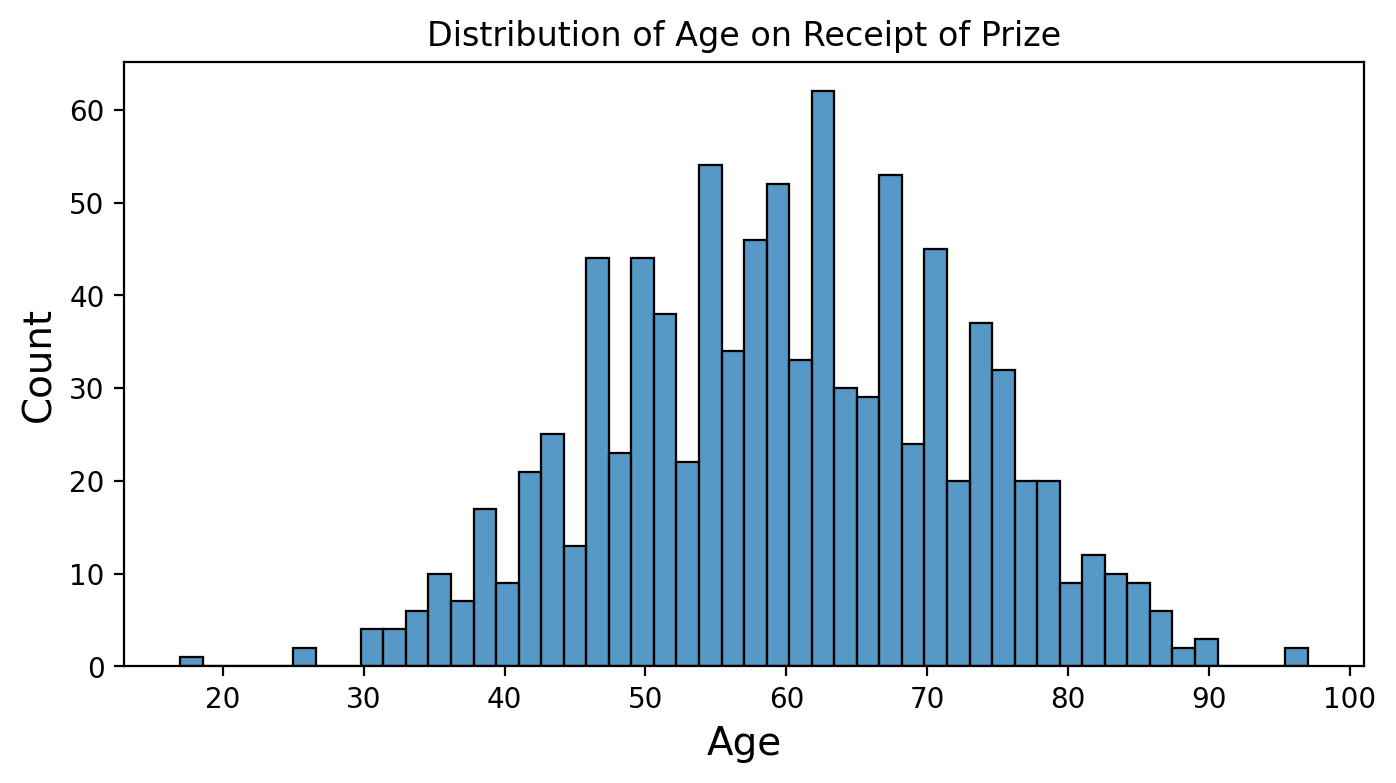

In [ ]:
# Using seaborn to plot Histogram to visualise the distribution of age in winning column
plt.figure(figsize=(8,4),dpi=200)

sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=50 # For what this bins parameter for..
             )

plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Distribution of Age on Receipt of Prize')
plt.show()


## **Seaborn**  regression plot and box plot

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


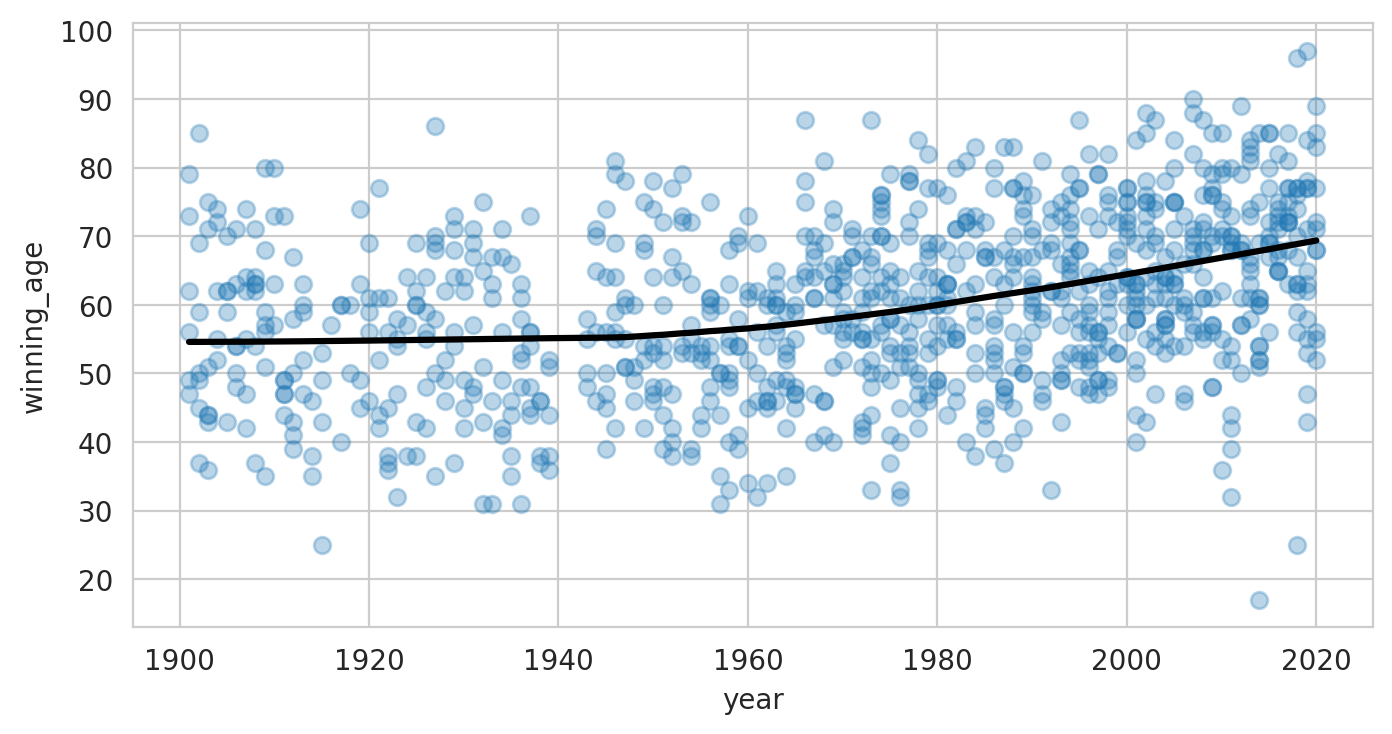

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=df_data,
              x='year',
              y='winning_age',
              lowess=True,
              scatter_kws={'alpha':0.3},# alpha here transparency 0 to 1.
              line_kws={'color':'black'}
              )

plt.show()

### Winning Age Across the Nobel Prize Categories
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.
How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

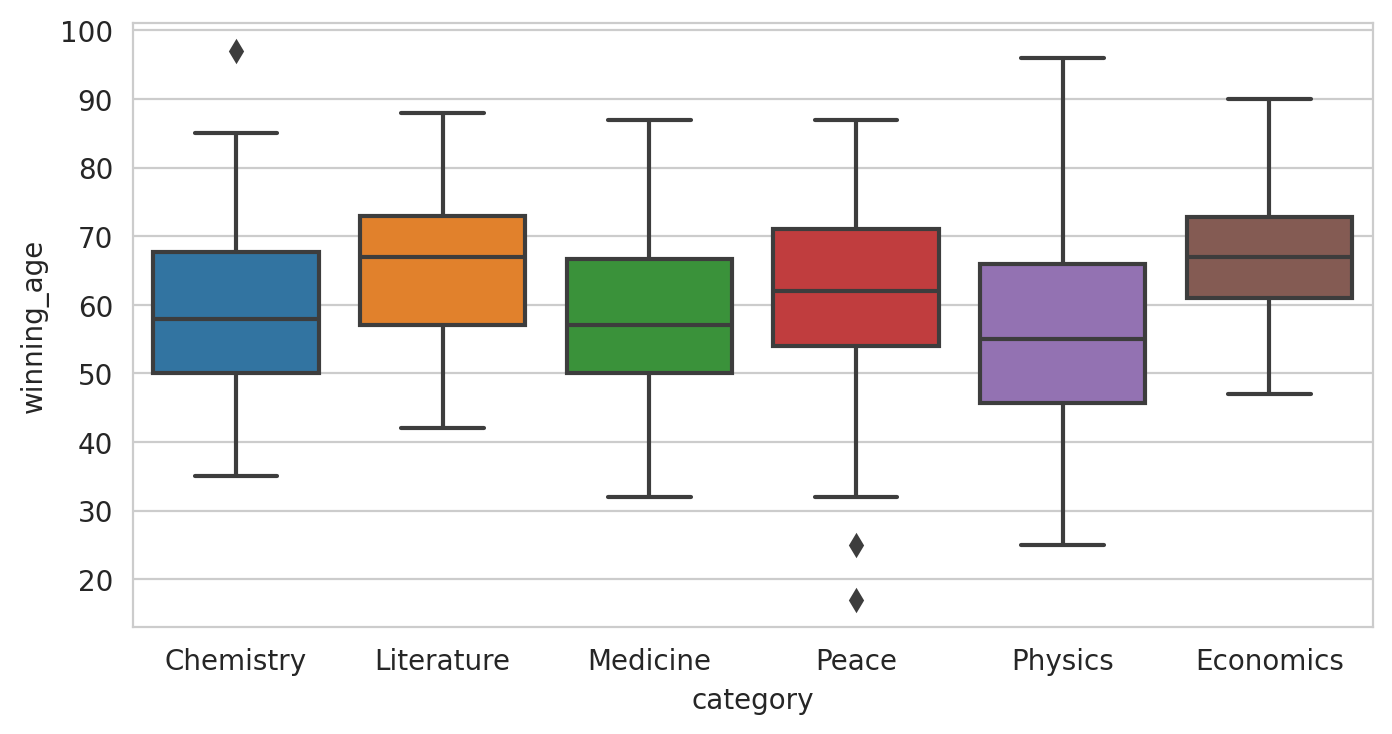

In [ ]:
# Earlier we have plotted boxplot with plotly, this time doing same with seaborn..
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('whitegrid'):
  sns.boxplot(data=df_data,
              x='category',
              y='winning_age',
              )
plt.show()
# I personally think plotly boxplot is good enough and very informative.

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


<Figure size 1600x800 with 0 Axes>

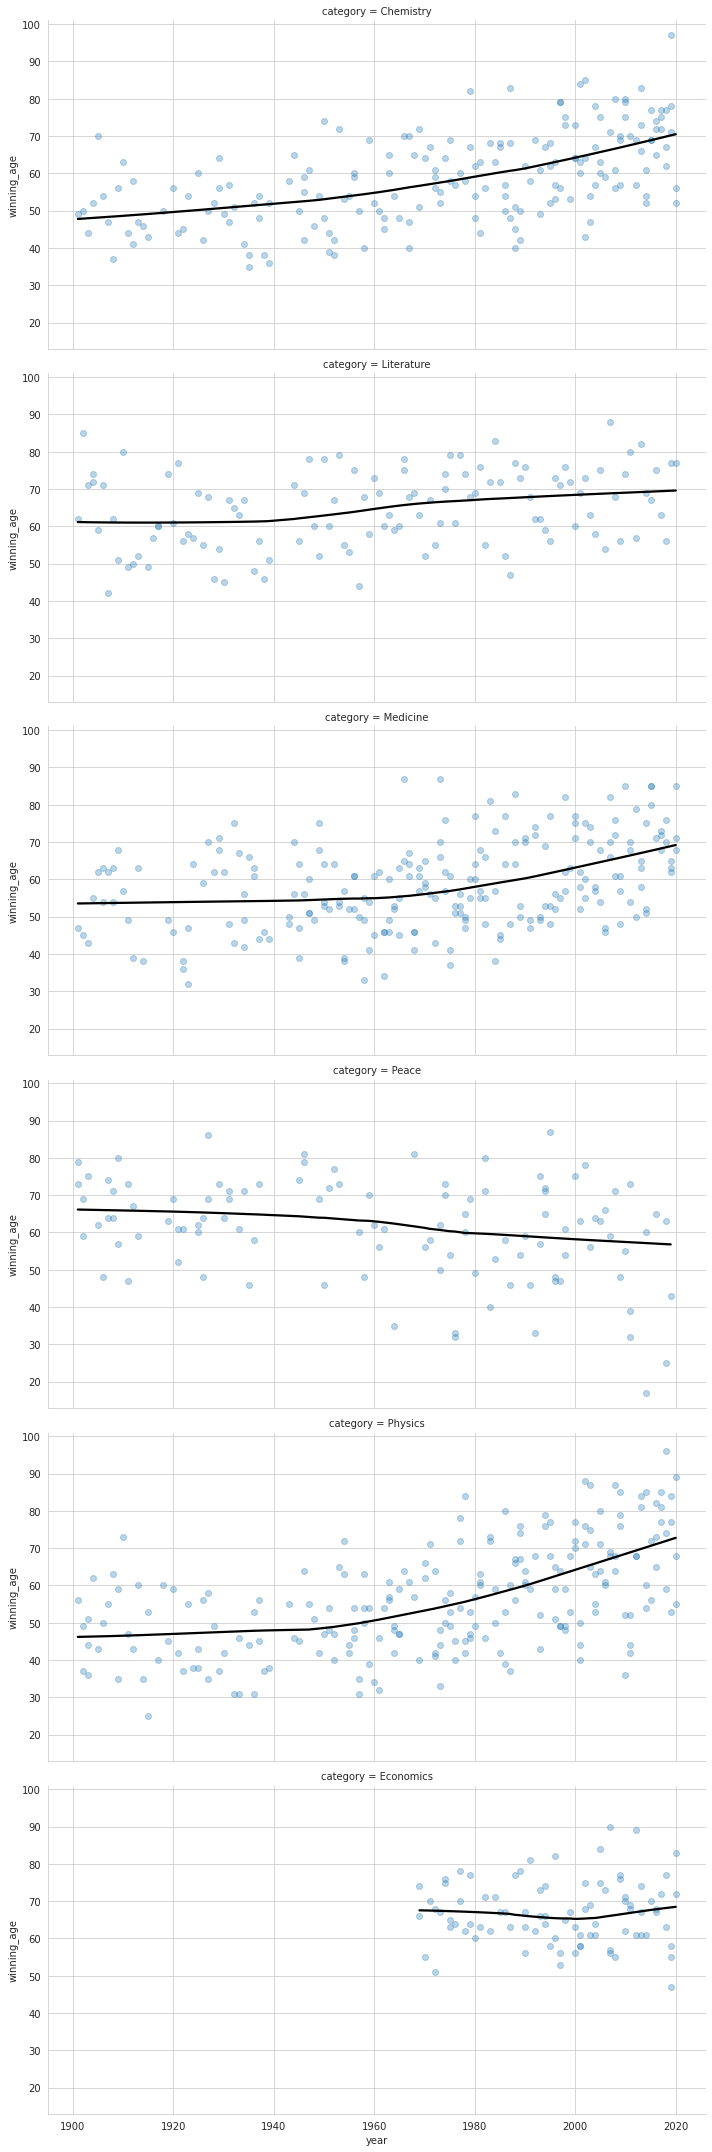

In [ ]:
# here we have plott reglpot  for  all 6 prize category on how the age of winners has changed over time.
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
           x='year',
           y='winning_age',
           row='category',# row corresponding to each category.
           lowess=True,# lowess parameter to True to show a moving average of the linear fit.
           aspect=2,
           scatter_kws={'alpha':0.3},
           line_kws={'color':'black'}
)

plt.show()

### To combine all these chart into a single one use **hue** parameter

<Figure size 1600x800 with 0 Axes>

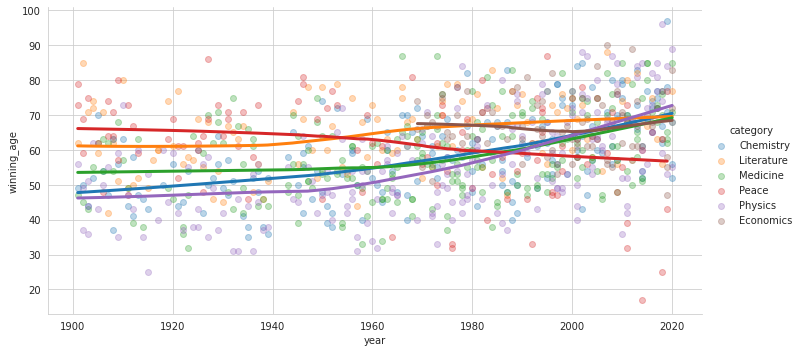

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
           x='year',
           y='winning_age',
           hue='category',# row corresponding to each category.
           lowess=True,# lowess parameter to True to show a moving average of the linear fit.
           aspect=2,# Aspect ratio of each facet.
           scatter_kws={'alpha':0.3},
           line_kws={'linewidth':3}
)

plt.show()